In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud
from collections import Counter
import pickle

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv("C:\\Users\\LENOVO\\OneDrive\\Desktop\\jupyter notebook coding\\sms classifier\\Pure Model\\SPAM SMS.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
df.sample(5)

,v1,v2
272,spam,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...
524,spam,"URGENT!: Your Mobile No. was awarded a å£2,000..."
512,ham,Lol ok your forgiven :)
1602,ham,Ok pa. Nothing problem:-)
285,ham,"K, I might come by tonight then if my class le..."


In [8]:
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)

In [9]:
df.sample(5)

,message_type,message
5387,ham,I will be gentle baby! Soon you will be taking...
1342,ham,Yeah I'll try to scrounge something up
2471,ham,"sry can't talk on phone, with parents"
1666,ham,Guess who spent all last night phasing in and ...
2798,ham,I've told him that i've returned it. That shou...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

1515    0
3467    0
4819    1
3662    0
1151    0
Name: message_type, dtype: int32

In [11]:
df[df['message_type']==1]

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [12]:
df.isnull().sum()

message_type    0
message         0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df= df.drop_duplicates()

In [15]:
df['message_type'].value_counts()

message_type
0    4516
1     653
Name: count, dtype: int64

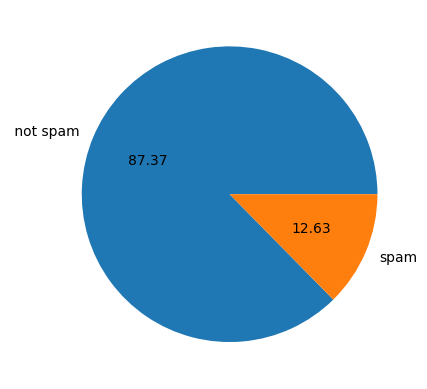

In [16]:
plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

In [26]:
df.loc[:, ('num_characters', 'message')]
df.head()

,message_type,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
df['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [35]:
#df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

def word_count(text):
    words = nltk.word_tokenize(text)
    word_counts = Counter(words)
    return word_counts

df['word_counts'] = df['message'].apply(word_count)

df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['message']), axis=1)

df.head(5)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24940\572835117.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_counts'] = df['message'].apply(word_count)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24940\572835117.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['message']), axis=1)


,message_type,message,num_characters,num_words,num_sentences,tokenized_sents,word_counts
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[Go, until, jurong, point, ,, crazy, .., Avail...","{'Go': 1, 'until': 1, 'jurong': 1, 'point': 1,..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[Ok, lar, ..., Joking, wif, u, oni, ...]","{'Ok': 1, 'lar': 1, '...': 2, 'Joking': 1, 'wi..."
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","{'Free': 1, 'entry': 2, 'in': 1, '2': 1, 'a': ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[U, dun, say, so, early, hor, ..., U, c, alrea...","{'U': 2, 'dun': 1, 'say': 2, 'so': 1, 'early':..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...","{'Nah': 1, 'I': 1, 'do': 1, 'n't': 1, 'think':..."


In [38]:
#df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
#df.loc[:, ('num_sentences', 'message')].apply(lambda x: len(nltk.sent_tokenize(x)))

stop_words = set(stopwords.words('english'))

def word_count(text):
    words = nltk.word_tokenize(text)
    word_counts = Counter(words)
    words = [word.lower() for word in words if word.lower() not in stop_words]
    return word_counts

df['word_counts'] = df['message'].apply(word_count)

df['tokenized_sents'] = df['message'].apply(nltk.word_tokenize)

df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24940\1502455253.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_counts'] = df['message'].apply(word_count)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24940\1502455253.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_sents'] = df['message'].apply(nltk.word_tokenize)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24940\1502455253.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [39]:
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

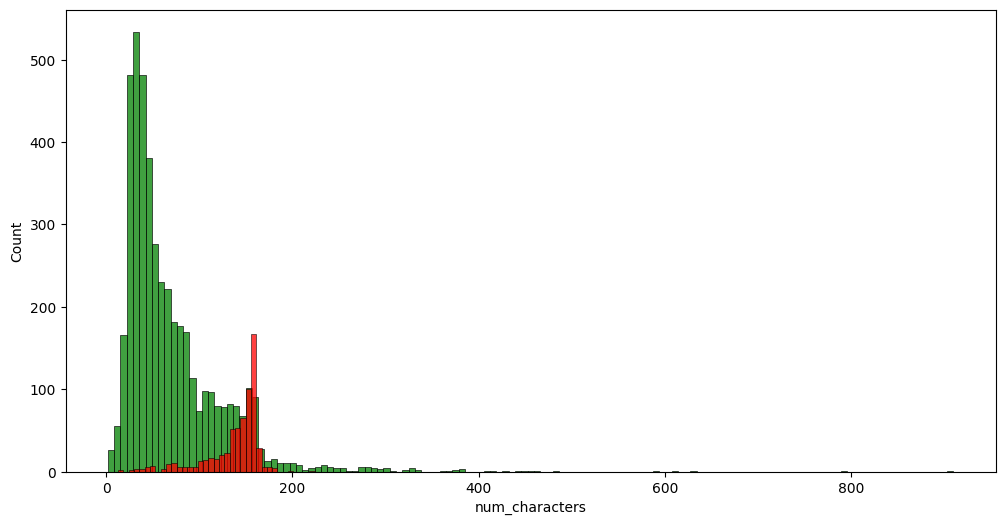

In [41]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

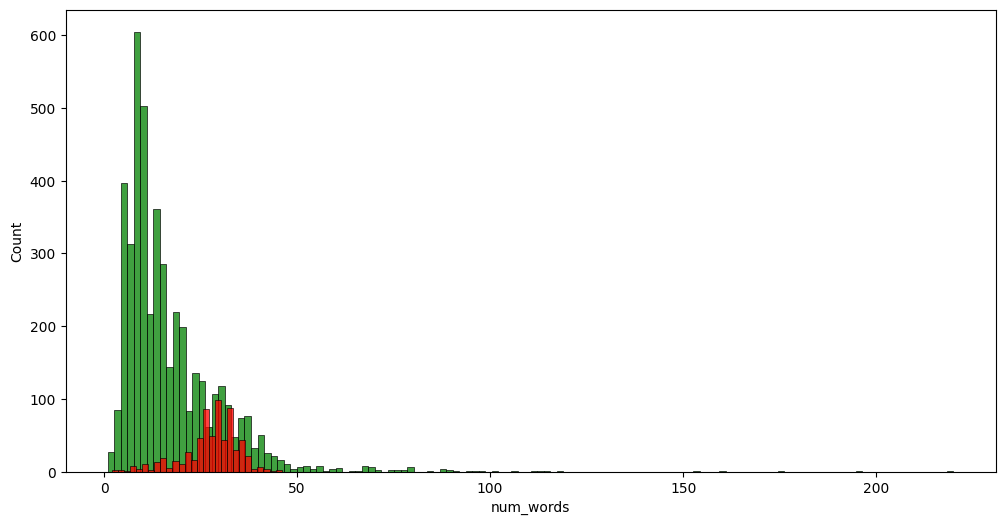

In [42]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')

In [44]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)
    y=[] 
    for i in message:
        if i.isalnum():
            y.append(i)

        y.clear()
    
    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()
    
    #now stemming function
    for i in message:
        y.append(ps.stem(i))
    
    #return y  --> returns as list
    return " ".join(y)

In [45]:
# Removing stop words and punctuations
stopwords.words('english')
len(stopwords.words('english')) 

179

In [46]:
#now for punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
# stemming
ps =PorterStemmer()

In [48]:
df['transformed_msg']=df['message'].apply(text_transform)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24940\2834270334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_msg']=df['message'].apply(text_transform)


In [49]:
df.head(5)

,message_type,message,num_characters,num_words,num_sentences,tokenized_sents,word_counts,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[Go, until, jurong, point, ,, crazy, .., Avail...","{'Go': 1, 'until': 1, 'jurong': 1, 'point': 1,...",go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,"[Ok, lar, ..., Joking, wif, u, oni, ...]","{'Ok': 1, 'lar': 1, '...': 2, 'Joking': 1, 'wi...",ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","{'Free': 1, 'entry': 2, 'in': 1, '2': 1, 'a': ...",free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,"[U, dun, say, so, early, hor, ..., U, c, alrea...","{'U': 2, 'dun': 1, 'say': 2, 'so': 1, 'early':...",u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...","{'Nah': 1, 'I': 1, 'do': 1, 'n't': 1, 'think':...",nah n't think goe usf live around though


In [50]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [51]:
spam_wc=wc.generate(df[df['message_type']==1]['transformed_msg'].str.cat(sep=""))

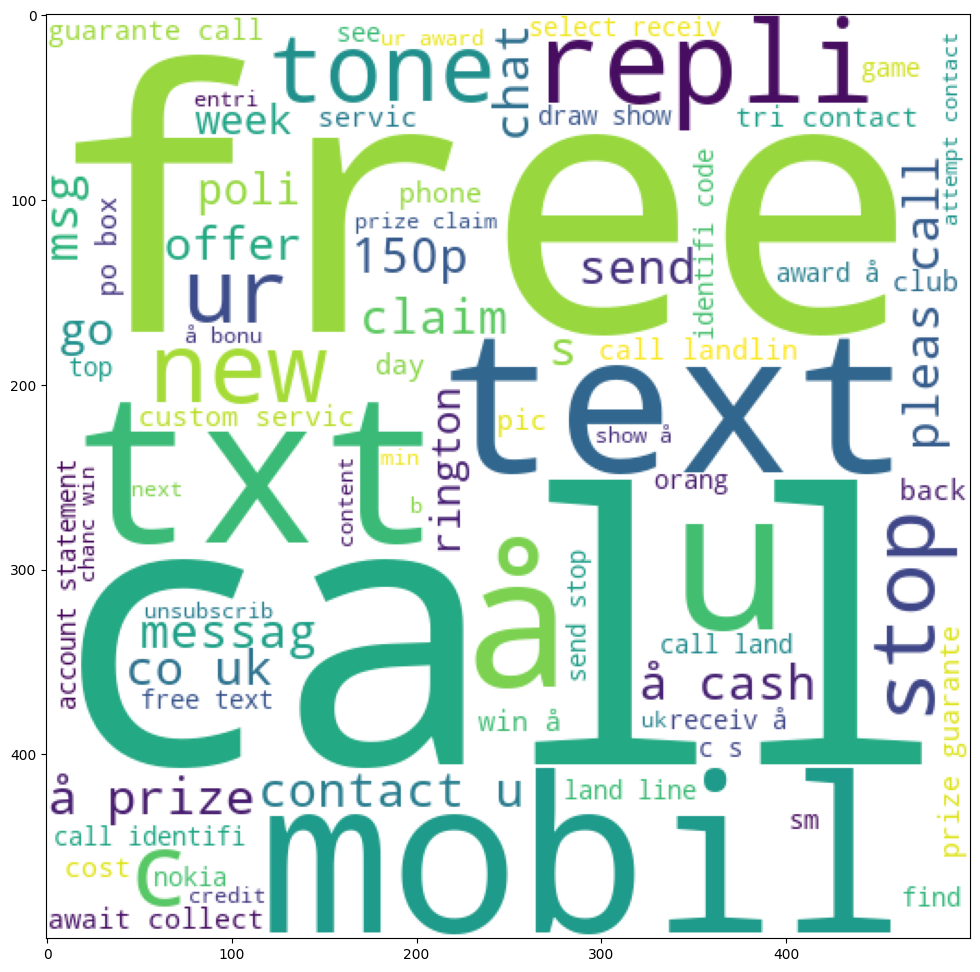

In [52]:
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

In [53]:
ham_wc=wc.generate(df[df['message_type']==0]['transformed_msg'].str.cat(sep=""))

In [54]:
plt.figure(figsize=(18,12))

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

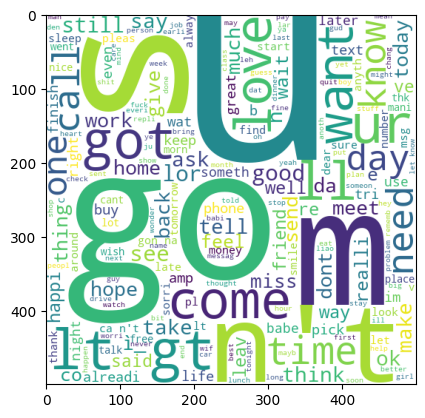

In [55]:
plt.imshow(ham_wc)

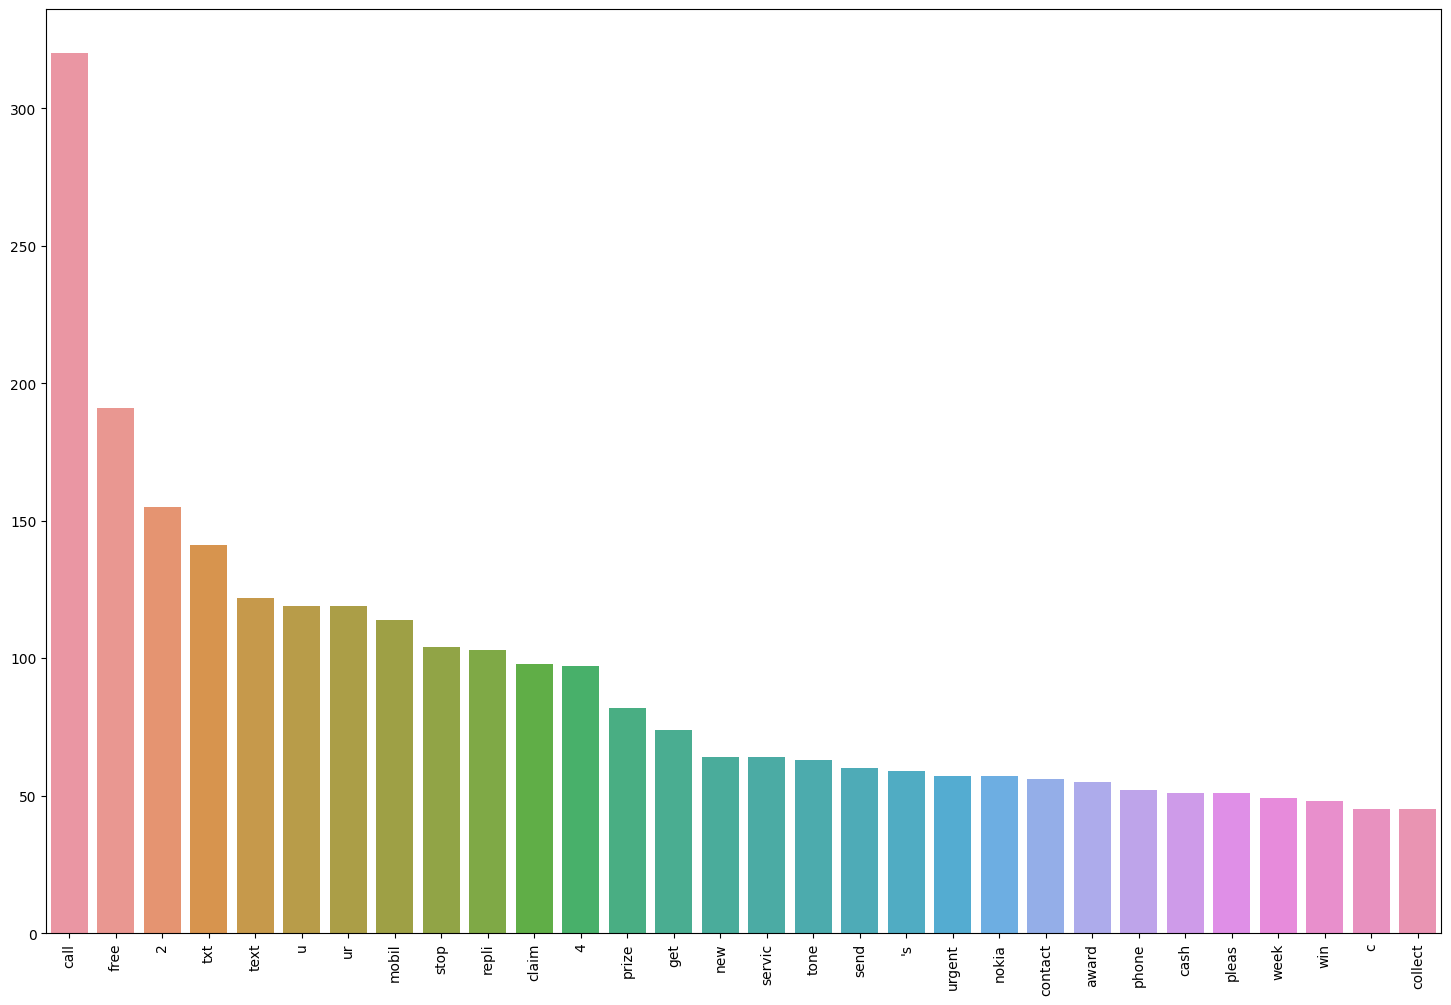

In [59]:
spam_corpus=[]
for msg in df[df['message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
counter = Counter(spam_corpus)
top_words = counter.most_common(30)
plt.figure(figsize=(18,12))
sns.barplot(x= [x[0] for x in top_words], y=[x[1] for x in top_words]) 
plt.xticks(rotation='vertical')
plt.show()



In [60]:
tfidf= TfidfVectorizer(max_features=3000) 


In [61]:
X=tfidf.fit_transform(df['transformed_msg']).toarray()
y=df['message_type'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [62]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [63]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.8781431334622823
Confusion Matrix of Guassian NB is:  [[790 106]
 [ 20 118]]
Precision score of the Gaussian NB is 0.5267857142857143


In [64]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

Accuracy score of Multinomial NB is:  0.9748549323017408
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 26 112]]
Precision score of the Multinomial NB is 1.0


In [65]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.988394584139265
Confusion Matrix of Bernoulli NB is:  [[896   0]
 [ 12 126]]
Precision score of the Bernoulli NB is 1.0


In [110]:
clfs = {gnb : GaussianNB(), mnb : MultinomialNB() ,bnb : BernoulliNB()}
accuracy_scores = {0.8781431334622823,0.9748549323017408,0.9883945841392650}
precision_scores = {0.5, 0.9, 1.0}

In [111]:
len(clfs.keys()) == len(accuracy_scores) == len(precision_scores)

True

In [131]:
# Placeholder for clfs_results and clfs_keys
clfs_results = [
    {'gnb' : 'GaussianNB()', 'Accuracy': 0.8781431334622823, 'Precision': 0.5},
    {' mnb' : 'MultinomialNB()', 'Accuracy': 0.9748549323017408, 'Precision': 0.9},
    {'bnb' : 'BernoulliNB()', 'Accuracy': 0.9883945841392650, 'Precision': 1.0},
]

clfs_keys = ['GaussianNB()', 'MultinomialNB()','BernoulliNB()']

# Create the performance DataFrame
performance_df = pd.DataFrame(clfs_results)
performance_df['Algorithm'] = clfs_keys

# Create temp_df
temp_df = pd.DataFrame({
    'Algorithm': clfs_keys,
    'Accuracy_scaling': [x['Accuracy'] for x in clfs_results],
    'Precision_scaling': [x['Precision'] for x in clfs_results]
}).sort_values('Precision_scaling', ascending=False)

In [132]:

# Create the performance DataFrame
performance_df = pd.DataFrame(clfs_results)
performance_df['Algorithm'] = clfs_keys

# Create temp_df
clfs_keys = list(clfs.keys())
accuracy_scores_list = list(accuracy_scores)
precision_scores_list = list(precision_scores)

temp_df = pd.DataFrame({
    'Algorithm': clfs_keys,
    'Accuracy_max_ft_3000': accuracy_scores_list,
    'Precision_max_ft_3000': precision_scores_list
}).sort_values('Precision_max_ft_3000', ascending=False)


In [133]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [134]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [142]:
clfs_keys = list(clfs.keys())
if any(isinstance(key, set) for key in clfs_keys):
    clfs_keys = [list(key) if isinstance(key, set) else key for key in clfs_keys]

temp_df = pd.DataFrame(
    [(key, getattr(value, 'accuracy_num_chars', None), getattr(value, 'precision_num_chars', None)) for key, value in clfs.items()],
    columns=['Algorithm', 'Accuracy_num_chars', 'Precision_num_chars']
).sort_values('Precision_num_chars', ascending=False)

In [143]:
new_df_scaled.merge(temp_df,on='Algorithm')

,gnb,Accuracy,Precision,mnb,bnb,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Algorithm,Accuracy_num_chars,Precision_num_chars


In [145]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))